In [7]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('rotterdam.csv')
df['meno'].value_counts(normalize=True)

meno
1   0.56
0   0.44
Name: proportion, dtype: float64

ER counts (pos/neg/NA): {1.0: 2253, 0.0: 729}
PGR counts (pos/neg/NA): {1.0: 1996, 0.0: 986}


C:\Users\ricca\AppData\Local\Temp\ipykernel_35476\2159191628.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='er_cat', data=df, ax=axes[0], palette=['#2ca02c','#ff7f0e'])
C:\Users\ricca\AppData\Local\Temp\ipykernel_35476\2159191628.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pgr_cat', data=df, ax=axes[1], palette=['#2ca02c','#ff7f0e'])


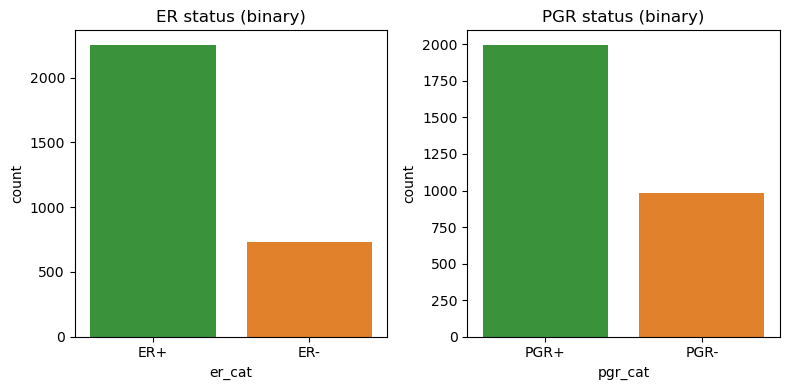

In [8]:
# Convert continuous ER and PGR into binary categorical variables (threshold > 10 fmol/mg)
# Create numeric binary (0/1) and human-readable categorical versions
import numpy as np
import pandas as pd

# numeric 0/1 (use NaN when original is NaN)
df['er_pos'] = np.where(df['er'].notna(), (df['er'] > 10).astype(int), np.nan)
df['pgr_pos'] = np.where(df['pgr'].notna(), (df['pgr'] > 10).astype(int), np.nan)

# categorical labels
df['er_cat'] = df['er_pos'].map({1: 'ER+', 0: 'ER-'})
df.loc[df['er'].isna(), 'er_cat'] = pd.NA

df['pgr_cat'] = df['pgr_pos'].map({1: 'PGR+', 0: 'PGR-'})
df.loc[df['pgr'].isna(), 'pgr_cat'] = pd.NA

# Quick summary
print('ER counts (pos/neg/NA):', df['er_pos'].value_counts(dropna=False).to_dict())
print('PGR counts (pos/neg/NA):', df['pgr_pos'].value_counts(dropna=False).to_dict())

# Quick plots
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
sns.countplot(x='er_cat', data=df, ax=axes[0], palette=['#2ca02c','#ff7f0e'])
axes[0].set_title('ER status (binary)')
sns.countplot(x='pgr_cat', data=df, ax=axes[1], palette=['#2ca02c','#ff7f0e'])
axes[1].set_title('PGR status (binary)')
plt.tight_layout()
plt.show()

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pid,"2,982.00","1,504.95",868.39,1.00,753.25,"1,504.50","2,254.75","3,007.00"
year,"2,982.00","1,988.16",3.04,"1,978.00","1,986.00","1,988.00","1,990.00","1,993.00"
age,"2,982.00",55.06,12.95,24.00,45.00,54.00,65.00,90.00
hospital_id,"2,982.00",5.96,6.69,0.00,0.00,3.00,10.00,24.00
meno,"2,982.00",0.56,0.50,0.00,0.00,1.00,1.00,1.00
grade,"2,982.00",2.73,0.44,2.00,2.00,3.00,3.00,3.00
nodes,"2,982.00",2.71,4.38,0.00,0.00,1.00,4.00,34.00
pgr,"2,982.00",161.83,291.31,0.00,4.00,41.00,198.00,"5,004.00"
er,"2,982.00",166.59,272.47,0.00,11.00,61.00,202.75,"3,275.00"
hormon,"2,982.00",0.11,0.32,0.00,0.00,0.00,0.00,1.00


In [10]:
df[['meno', 'chemo']].value_counts(normalize=True)

meno  chemo
1     0       0.53
0     0       0.28
      1       0.16
1     1       0.03
Name: proportion, dtype: float64

In [11]:
colors = [
    '#baddf5', 
    '#cc2b2b'
]

In [12]:
num_vars = {"year", "age", "nodes", "pgr", "er", "rtime", "dtime"}
cat_vars = {"hospital_id", "meno", "size", "grade", "hormon", "chemo", "recur", "death"}

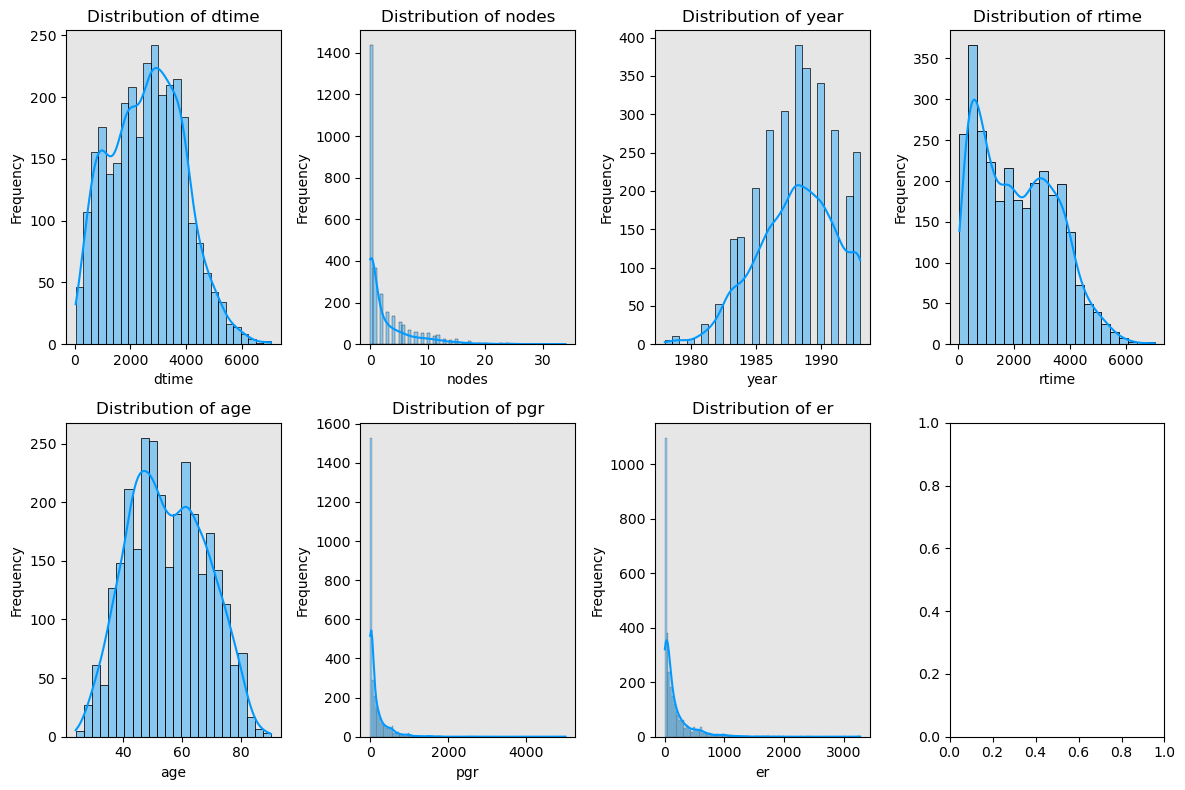

In [13]:
nrows = (len(num_vars) + 3) // 4
ncols = 4
num_vars_list = list(num_vars)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
for i in range(len(num_vars_list)):
    ax = axs[i // ncols, i % ncols]
    sns.histplot(data=df, x=num_vars_list[i], alpha=.4, kde=True, color="#0099ff", ax=ax)
    ax.set_title(f'Distribution of {num_vars_list[i]}')
    ax.set_xlabel(num_vars_list[i])
    ax.set_ylabel('Frequency')
    ax.set_facecolor('#e6e6e6')
plt.tight_layout()
plt.show()

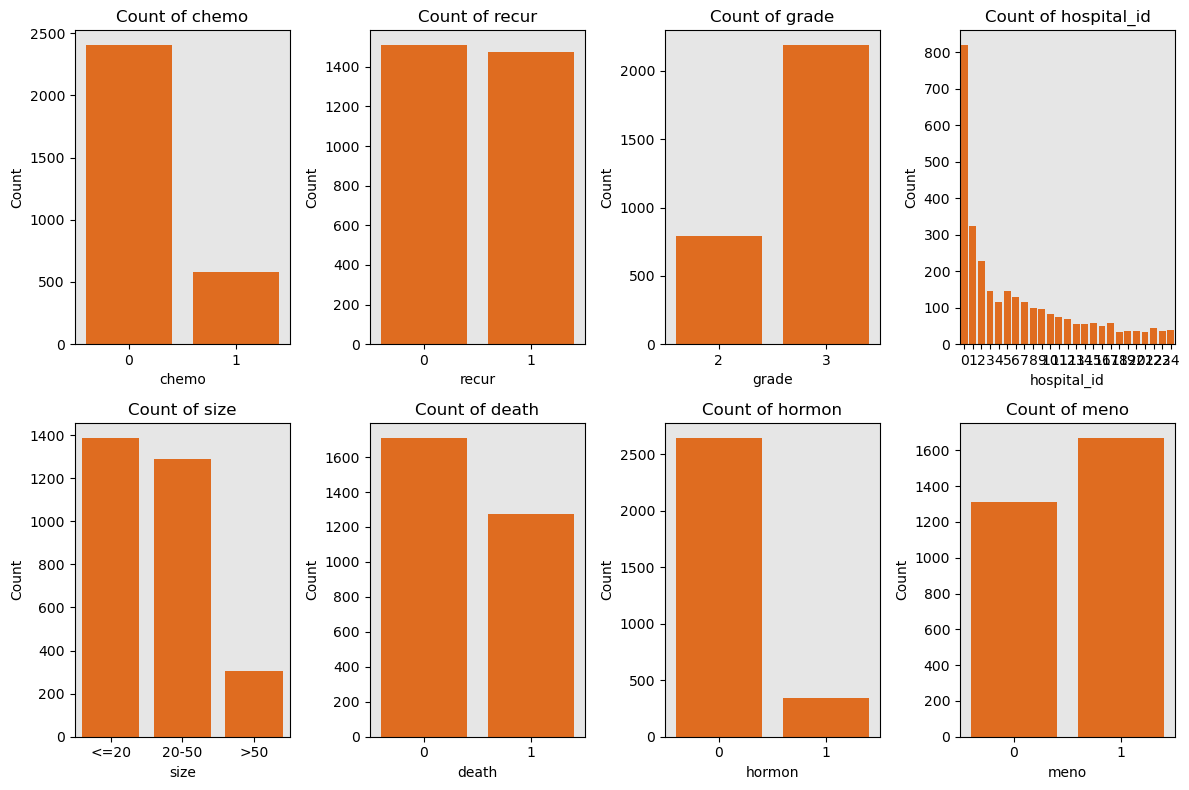

In [14]:
nrows = (len(cat_vars) + 3) // 4
ncols = 4
cat_vars_list = list(cat_vars)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
for i in range(len(cat_vars_list)):
    ax = axs[i // ncols, i % ncols]
    sns.countplot(data=df, x=cat_vars_list[i], color="#ff6600", ax=ax)
    ax.set_title(f'Count of {cat_vars_list[i]}')
    ax.set_xlabel(cat_vars_list[i])
    ax.set_ylabel('Count')
    ax.set_facecolor('#e6e6e6')
plt.tight_layout()
plt.show()

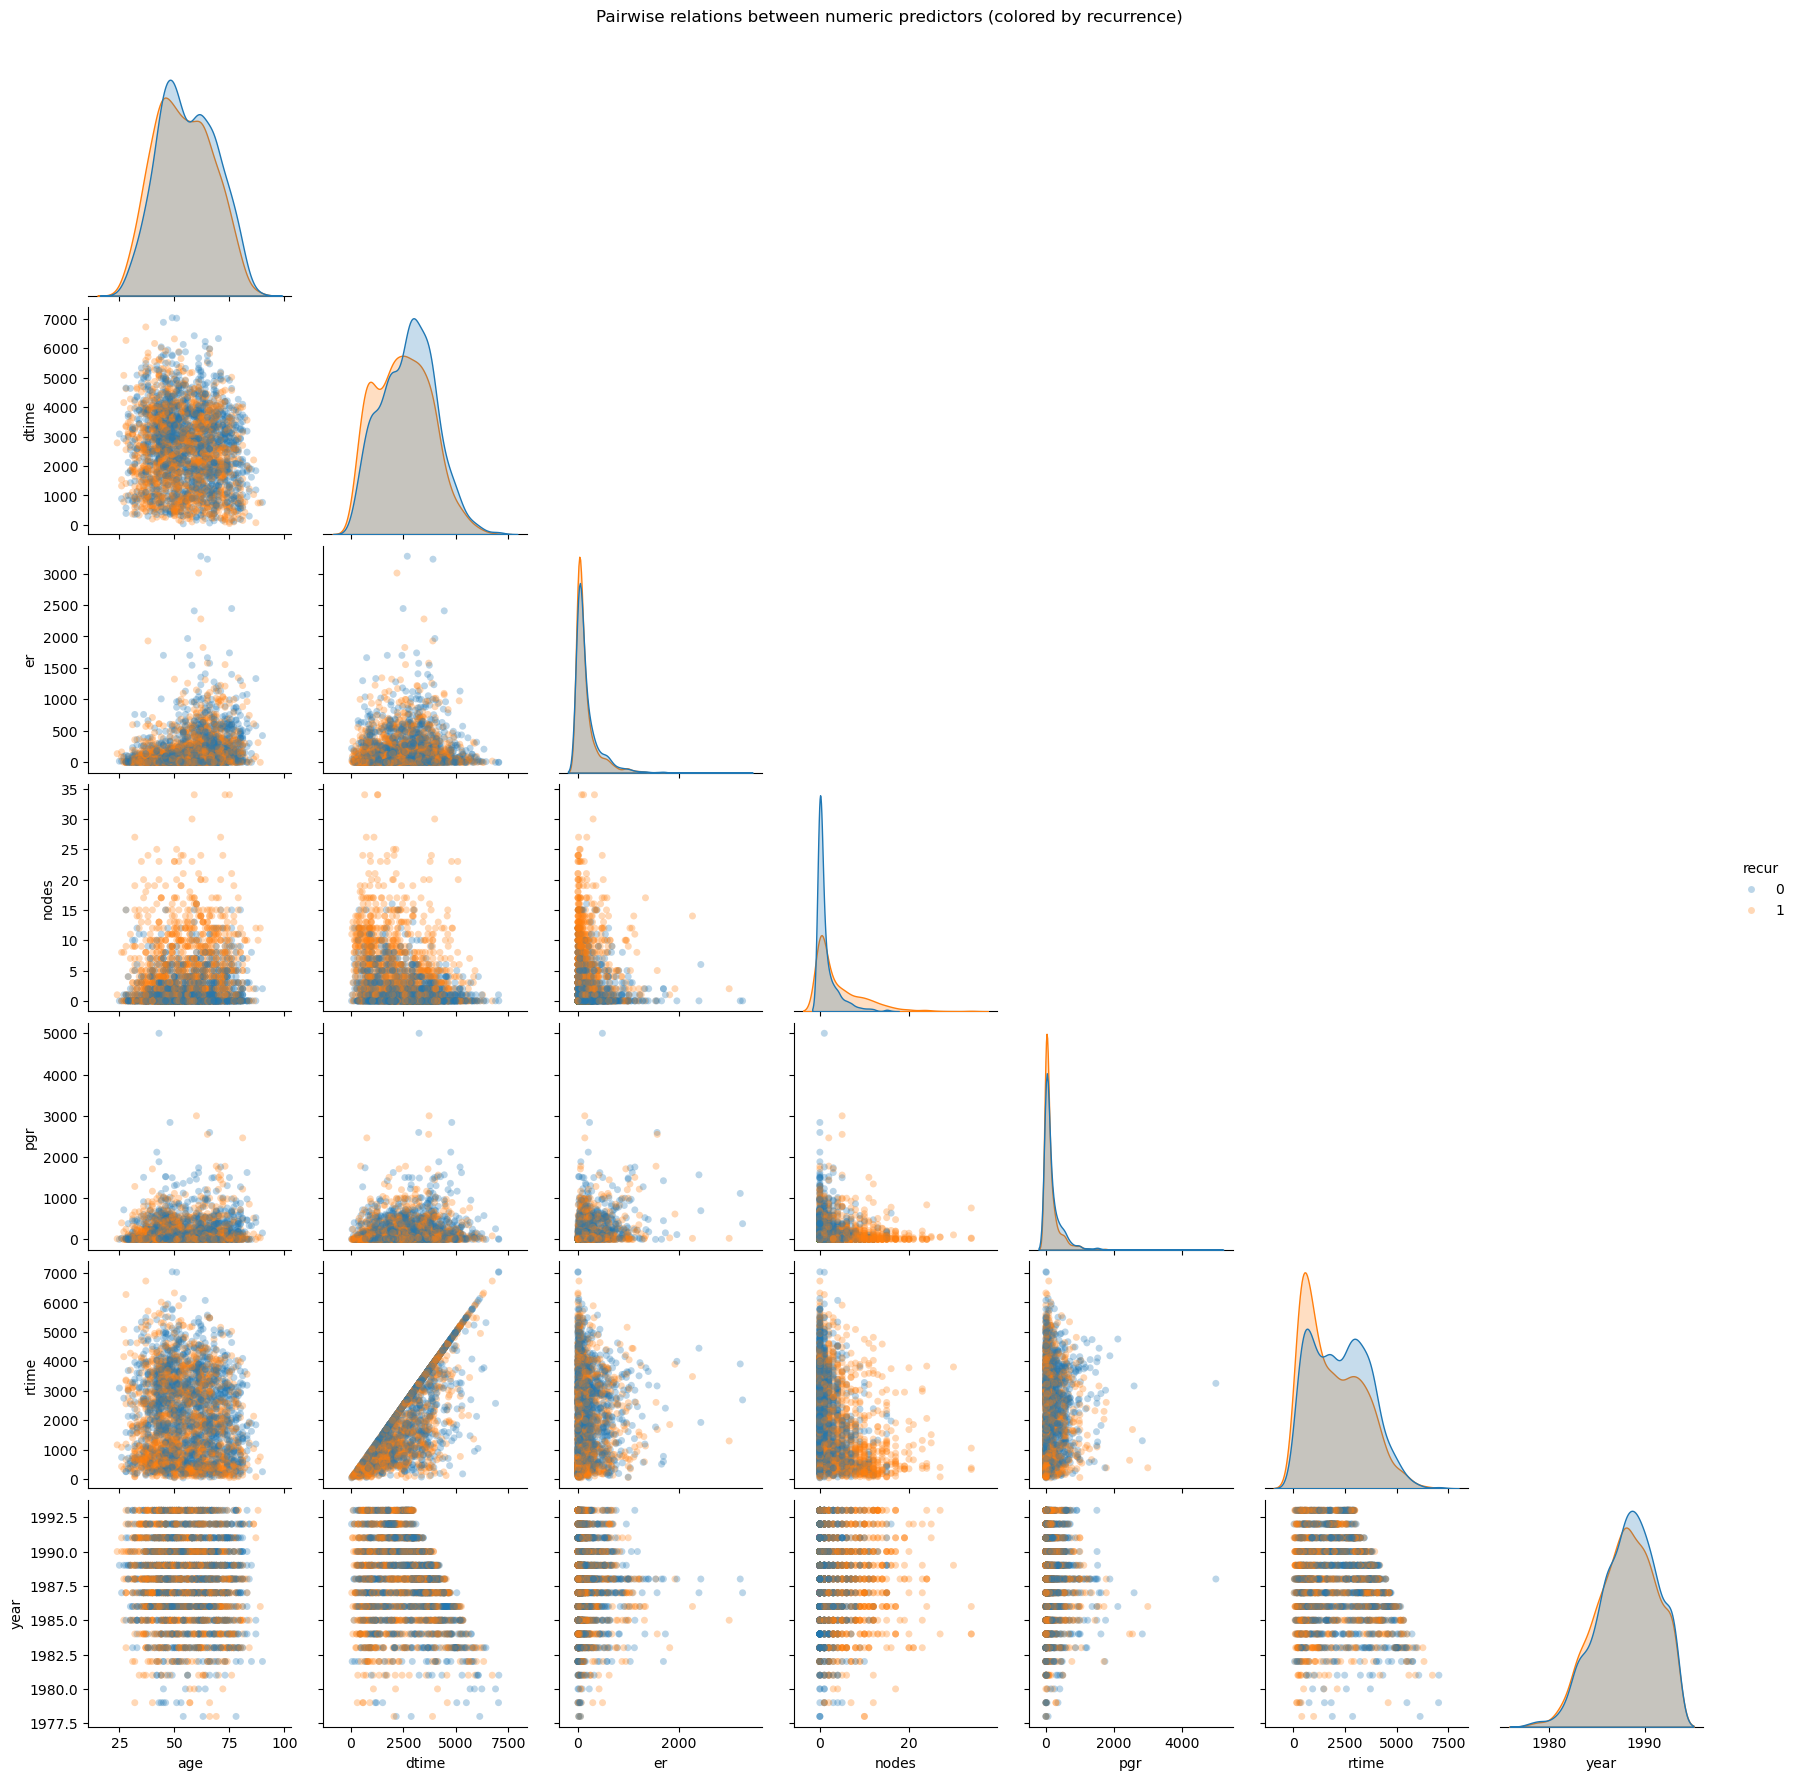

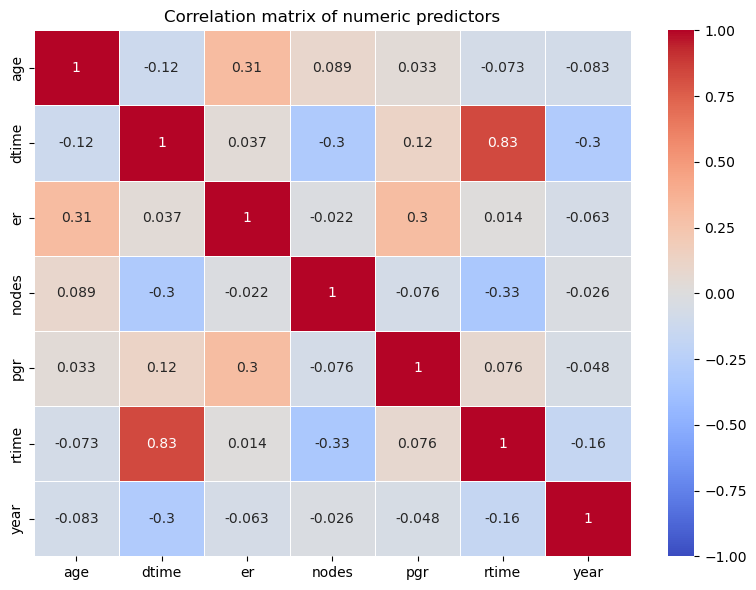

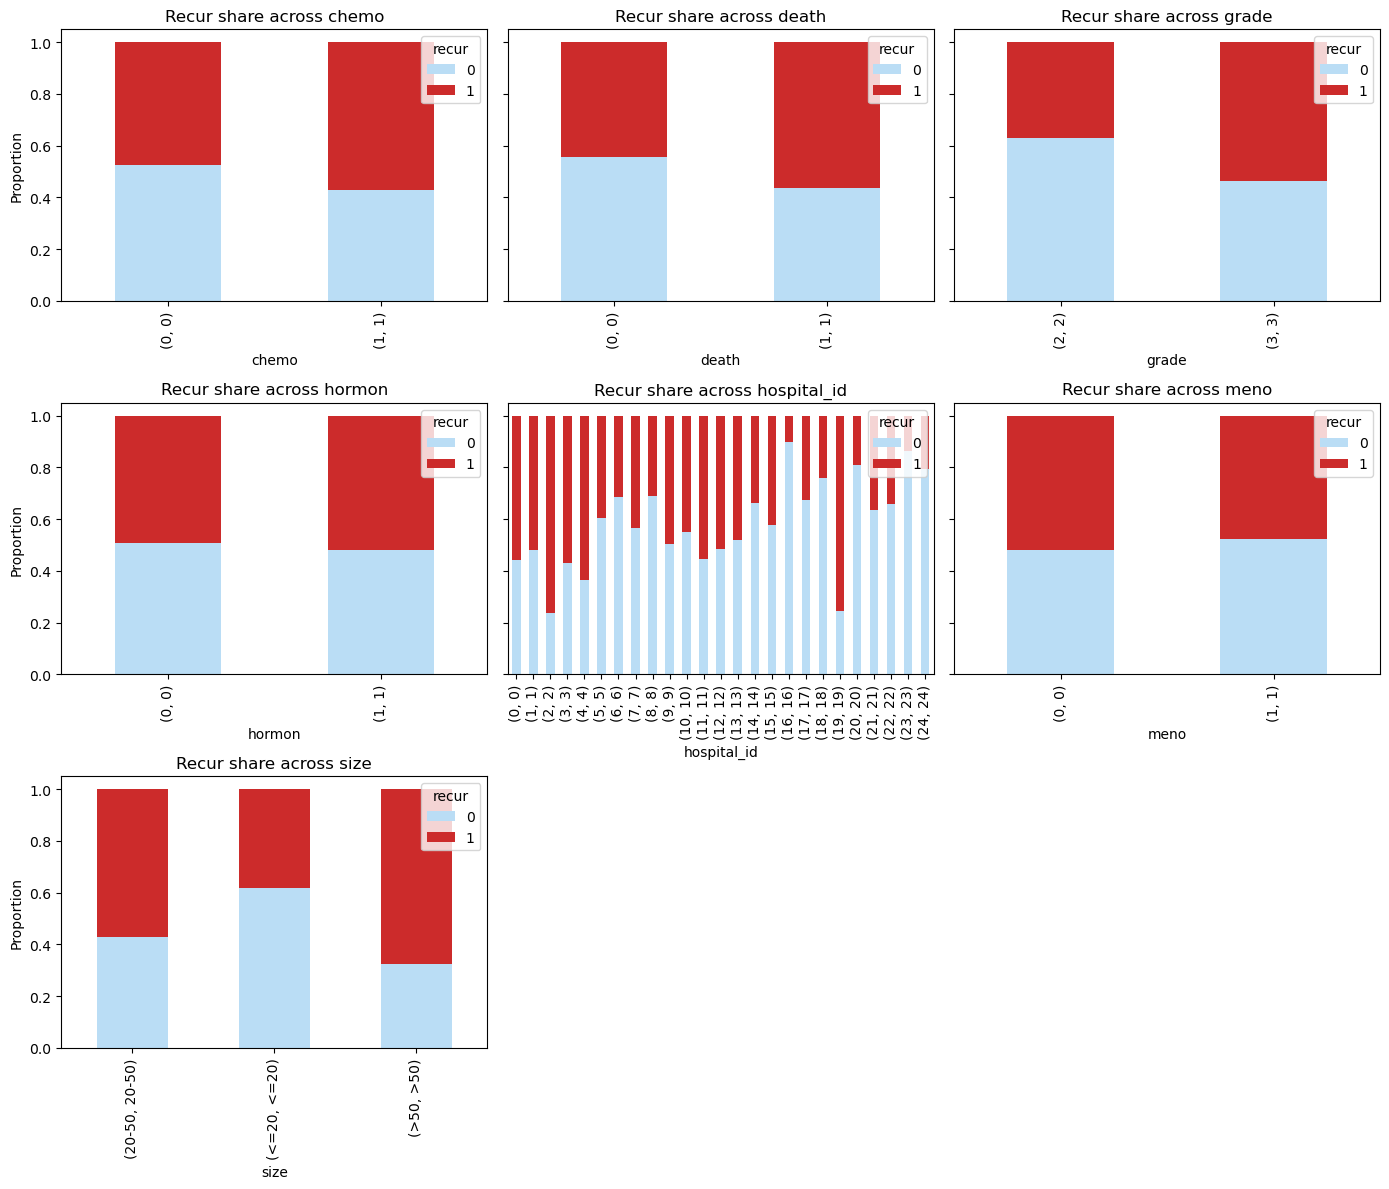

In [15]:
# --- numeric predictors: pairwise relationships + correlation structure ---
num_predictors = sorted(num_vars)
pair_df = df[num_predictors + ['recur']].dropna()

sns.pairplot(
    pair_df,
    hue='recur',
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha': 0.3, 's': 25, 'edgecolor': 'none'}
)
plt.suptitle('Pairwise relations between numeric predictors (colored by recurrence)', y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
corr = pair_df[num_predictors].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation matrix of numeric predictors')
plt.tight_layout()
plt.show()

# --- categorical predictors: dependency with the outcome ---
cat_predictors = sorted(cat_vars - {'recur'})
ncols = 3
nrows = (len(cat_predictors) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4 * nrows), sharey=True)
axes = axes.flatten()

for ax, col in zip(axes, cat_predictors):
    share = (
        df.groupby([col, 'recur'])
          .size()
          .groupby(level=0)
          .apply(lambda x: x / x.sum())
          .unstack(fill_value=0)
          .sort_index()
    )
    share.plot(kind='bar', stacked=True, color=colors, ax=ax)
    ax.set_title(f'Recur share across {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Proportion')
    ax.legend(title='recur', loc='upper right')

for ax in axes[len(cat_predictors):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [16]:
df['year'].min(), df['year'].max()

(1978, 1993)

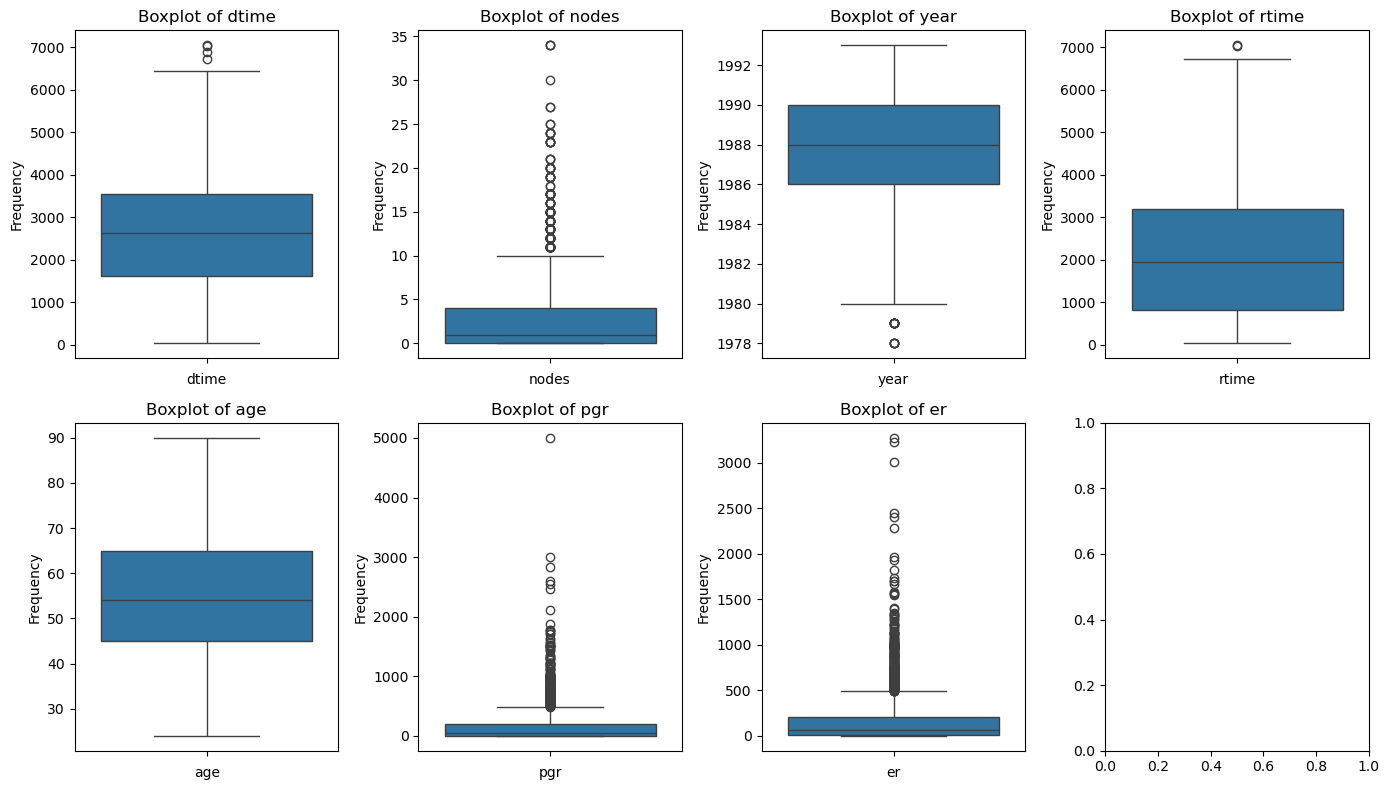

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 8))
ax = ax.flatten()
for i in range(len(num_vars_list)):
    sns.boxplot(data=df, y=num_vars_list[i], ax=ax[i])
    ax[i].set_title(f'Boxplot of {num_vars_list[i]}')
    ax[i].set_xlabel(num_vars_list[i])
    ax[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

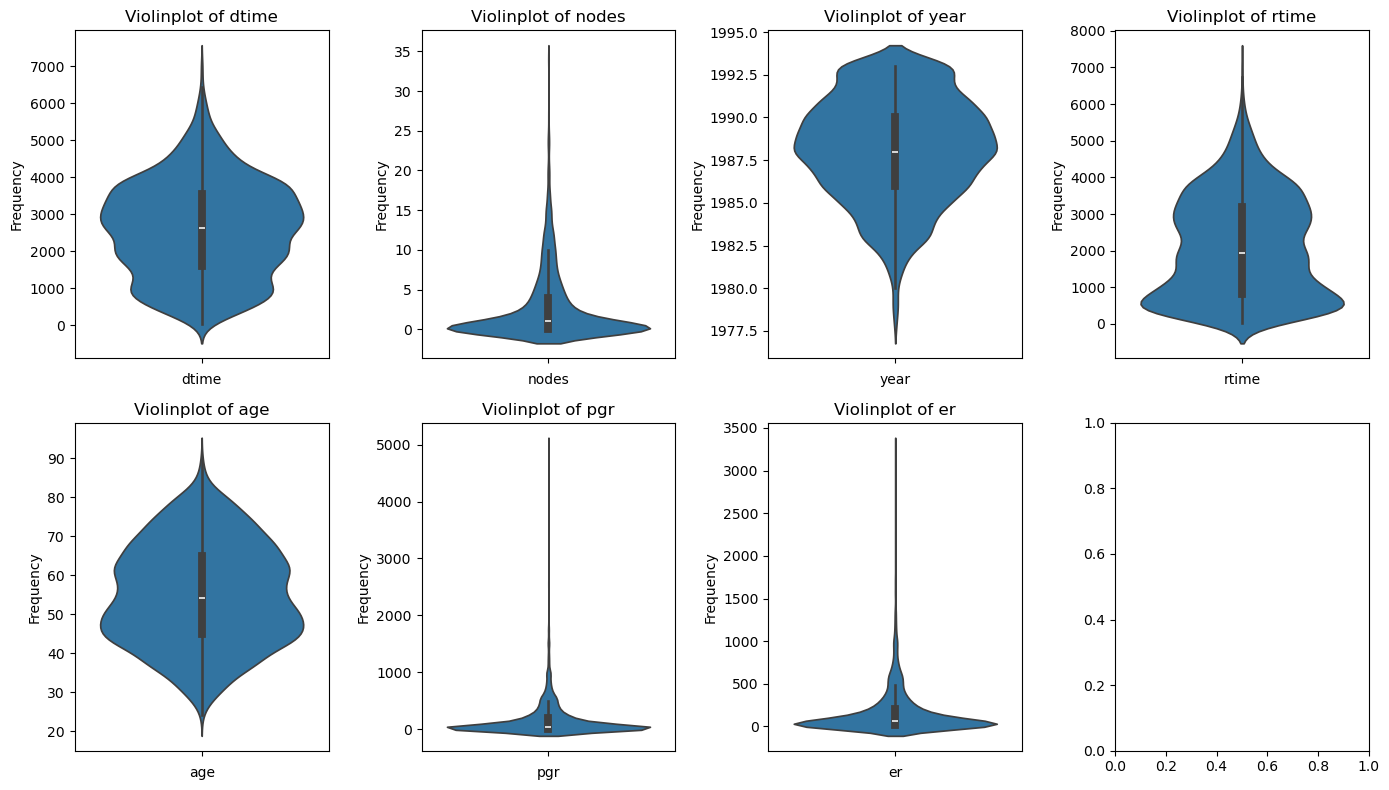

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 8))
ax = ax.flatten()
for i in range(len(num_vars_list)):
    sns.violinplot(data=df, y=num_vars_list[i], ax=ax[i])
    ax[i].set_title(f'Violinplot of {num_vars_list[i]}')
    ax[i].set_xlabel(num_vars_list[i])
    ax[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

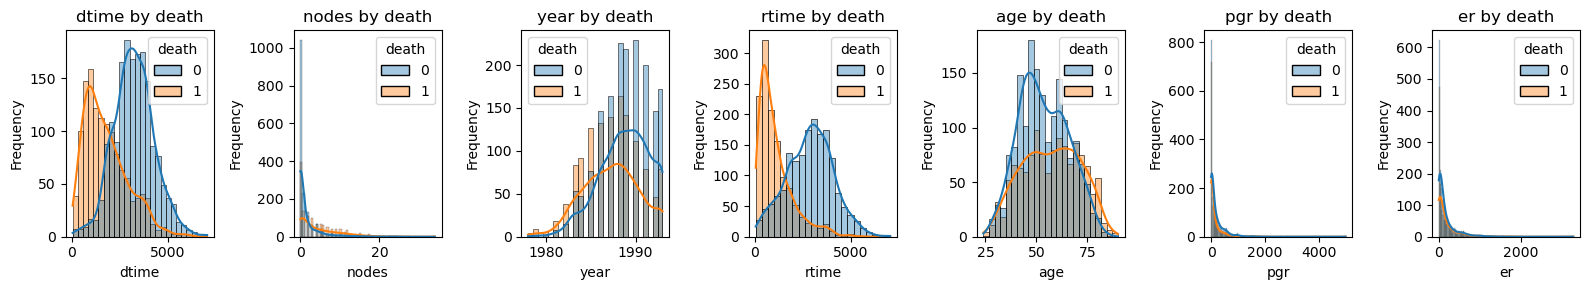

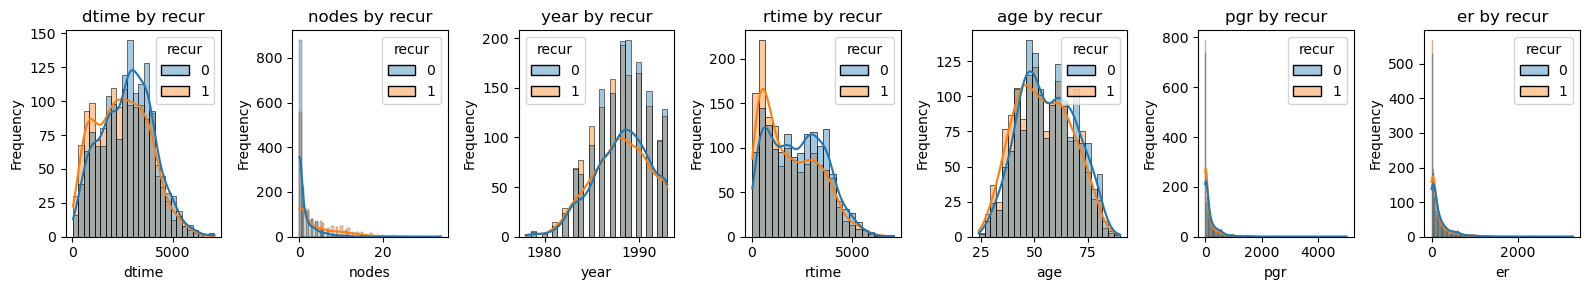

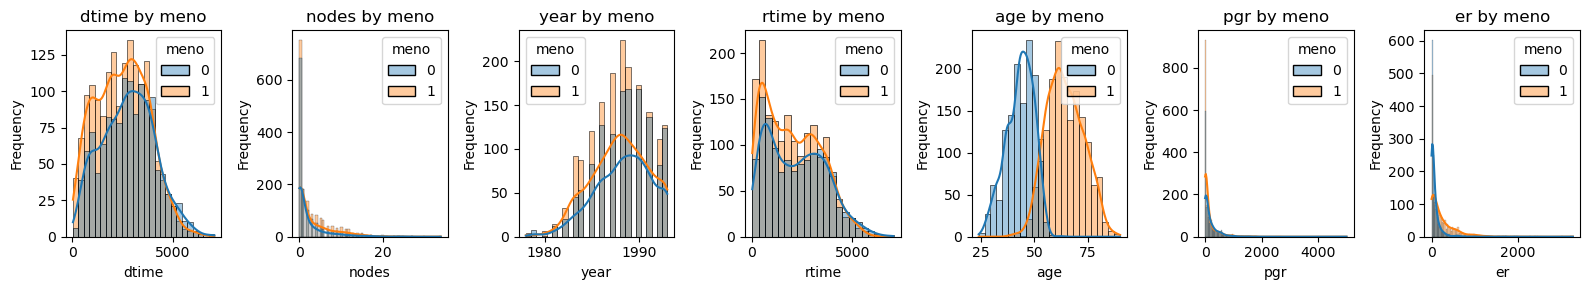

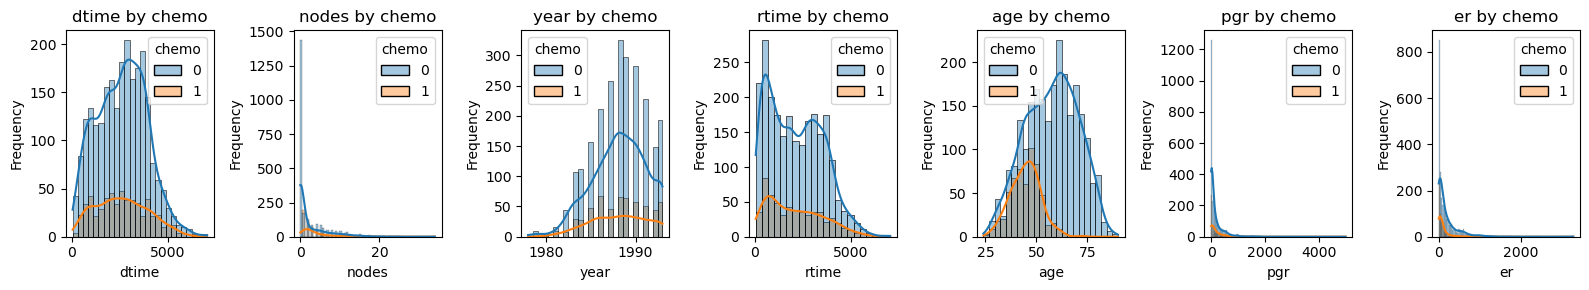

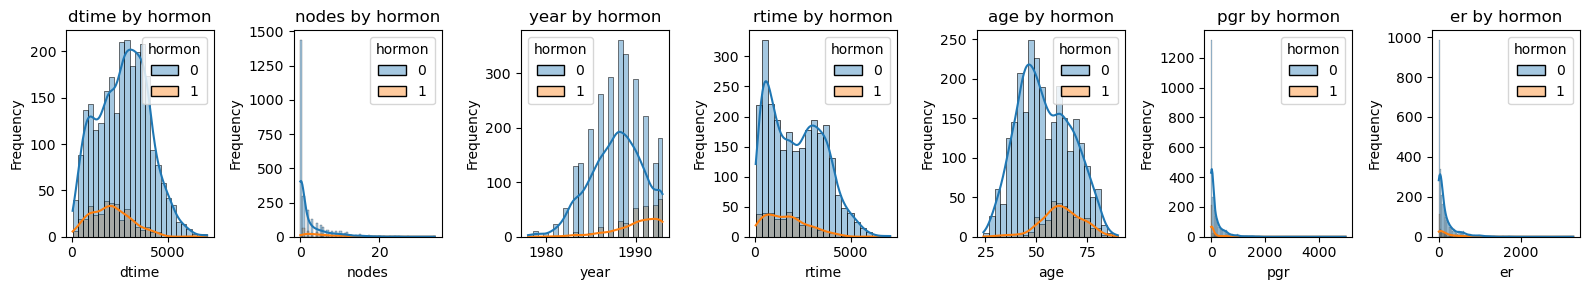

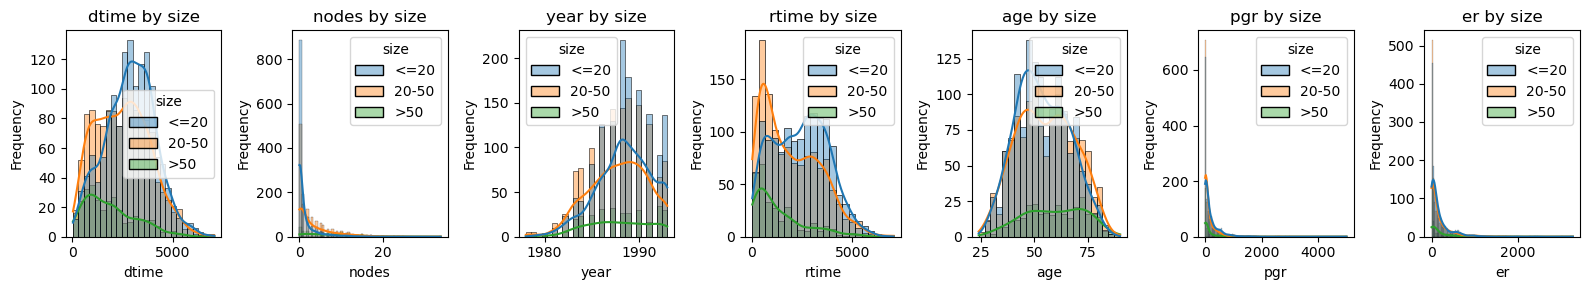

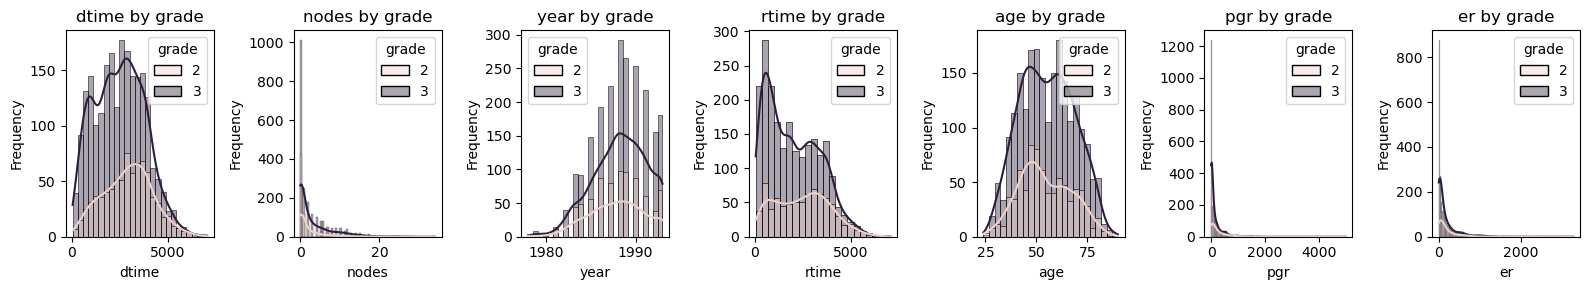

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(16, 3))
ax = ax.flatten()
for i in range(len(num_vars_list)):
    sns.histplot(data=df, x=num_vars_list[i], hue='death', alpha=.4, kde=True, color="#0099ff", ax=ax[i])
    ax[i].set_title(f'{num_vars_list[i]} by death')
    ax[i].set_xlabel(num_vars_list[i])
    ax[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(16, 3))
ax = ax.flatten()
for i in range(len(num_vars_list)):
    sns.histplot(data=df, x=num_vars_list[i], hue='recur', alpha=.4, kde=True, color="#0099ff", ax=ax[i])
    ax[i].set_title(f'{num_vars_list[i]} by recur')
    ax[i].set_xlabel(num_vars_list[i])
    ax[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(16, 3))
ax = ax.flatten()
for i in range(len(num_vars_list)):
    sns.histplot(data=df, x=num_vars_list[i], hue='meno', alpha=.4, kde=True, color="#0099ff", ax=ax[i])
    ax[i].set_title(f'{num_vars_list[i]} by meno')
    ax[i].set_xlabel(num_vars_list[i])
    ax[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(16, 3))
ax = ax.flatten()
for i in range(len(num_vars_list)):
    sns.histplot(data=df, x=num_vars_list[i], hue='chemo', alpha=.4, kde=True, color="#0099ff", ax=ax[i])
    ax[i].set_title(f'{num_vars_list[i]} by chemo')
    ax[i].set_xlabel(num_vars_list[i])
    ax[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(16, 3))
ax = ax.flatten()
for i in range(len(num_vars_list)):
    sns.histplot(data=df, x=num_vars_list[i], hue='hormon', alpha=.4, kde=True, color="#0099ff", ax=ax[i])
    ax[i].set_title(f'{num_vars_list[i]} by hormon')
    ax[i].set_xlabel(num_vars_list[i])
    ax[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(16, 3))
ax = ax.flatten()
for i in range(len(num_vars_list)):
    sns.histplot(data=df, x=num_vars_list[i], hue='size', alpha=.4, kde=True, color="#0099ff", ax=ax[i])
    ax[i].set_title(f'{num_vars_list[i]} by size')
    ax[i].set_xlabel(num_vars_list[i])
    ax[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(16, 3))
ax = ax.flatten()
for i in range(len(num_vars_list)):
    sns.histplot(data=df, x=num_vars_list[i], hue='grade', alpha=.4, kde=True, color="#0099ff", ax=ax[i])
    ax[i].set_title(f'{num_vars_list[i]} by grade')
    ax[i].set_xlabel(num_vars_list[i])
    ax[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
# Load data
df = pd.read_csv('rotterdam.csv')
# Filter features for recurrence model (exclude treatment and outcome columns)
# Use binary ER/PGR indicators (`er_pos`,`pgr_pos`) created earlier
features = ['age','year','hospital_id','meno','nodes','size','grade','er_pos','pgr_pos']
X = df[features].copy()
y = df['recur'].values  # target
# One-hot encode categorical features
X = pd.get_dummies(X, columns=['size','hospital_id'], drop_first=True)
print("Features after encoding:", X.columns.tolist())
print("X shape:", X.shape)
print("Proportion with recurrence:", y.mean().round(3))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

KeyError: "['er_pos', 'pgr_pos'] not in index"

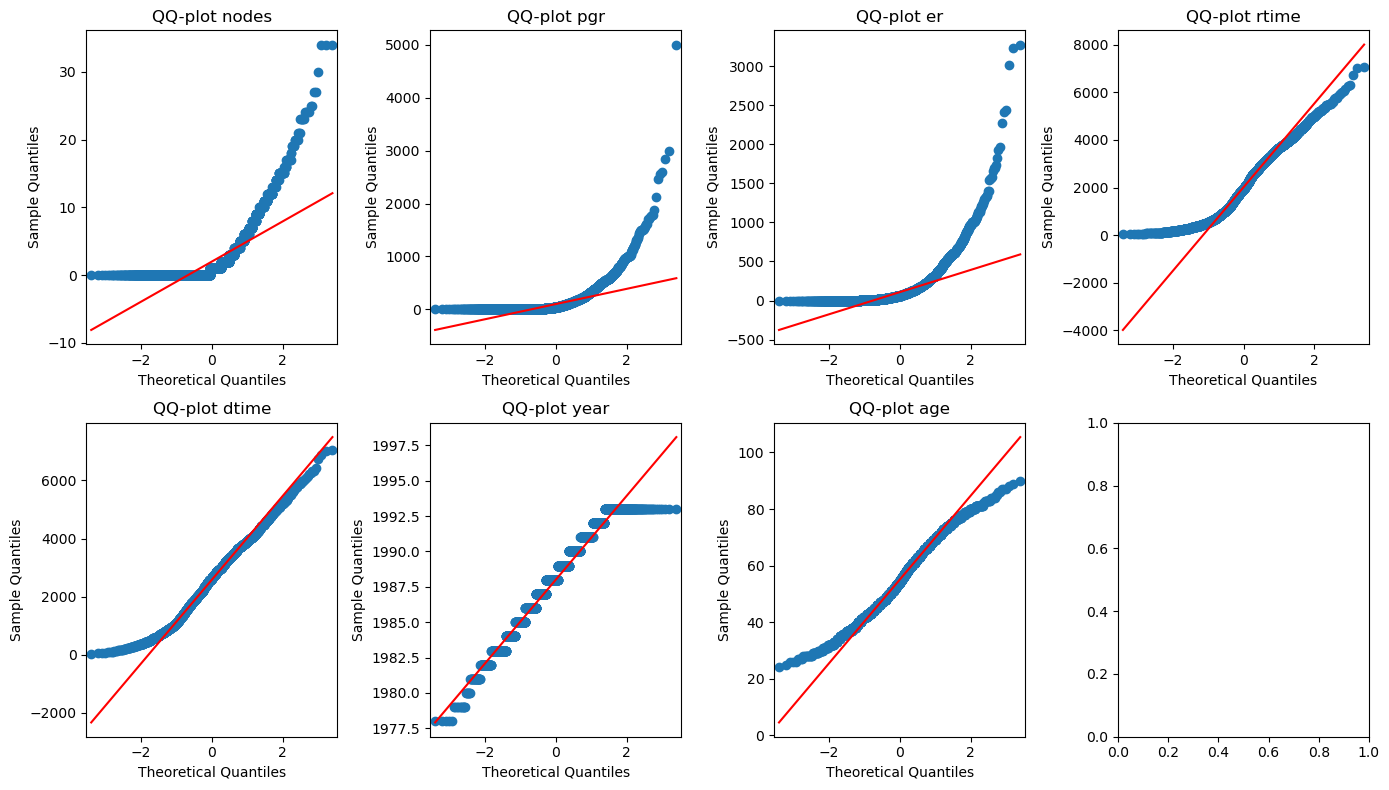

In [ ]:
import statsmodels.api as sm
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 8))
ax = ax.flatten()
for i in range(len(num_vars_list)):
  sm.qqplot(df[num_vars_list[i]], line='q', ax=ax[i])
  ax[i].set_title('QQ-plot ' + num_vars_list[i])
plt.tight_layout()
plt.show()

In [ ]:
# test di normalità e trasformazioni
import scipy.stats as stats
vars = ['age','year','nodes','pgr','er','rtime','dtime']
for v in vars:
    clean = df[v].dropna()
    sample = clean.sample(5000, random_state=0) if len(clean)>5000 else clean
    stat, p = stats.shapiro(sample)
    print(v, 'Shapiro p=', p)

age Shapiro p= 1.0136379466756321e-16
year Shapiro p= 1.1148285281889035e-24
nodes Shapiro p= 4.9060275936901493e-60
pgr Shapiro p= 6.316897397669024e-65
er Shapiro p= 4.1308131588619567e-63
rtime Shapiro p= 2.8352486155930023e-30
dtime Shapiro p= 1.3141879208352157e-16


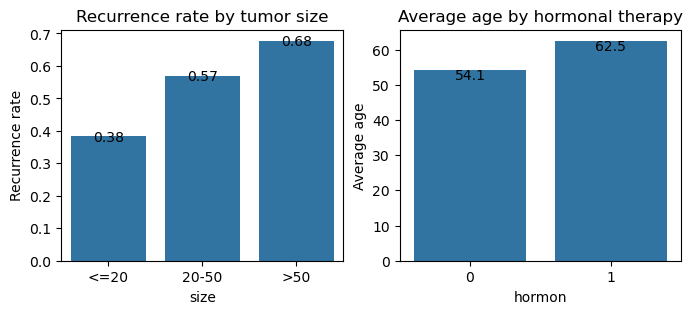

In [ ]:
size_recur = (
    df.groupby('size')['recur']
    .mean()
    .reset_index()
    .rename(columns={'recur': 'recur'})
)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
ax = ax.flatten()
size_order = ['<=20', '20-50', '>50']
size_recur['size'] = pd.Categorical(size_recur['size'], categories=size_order, ordered=True)
size_recur_sorted = size_recur.sort_values('size')
sns.barplot(x='size', y='recur', data=size_recur_sorted, ax=ax[0])
ax[0].set_title('Recurrence rate by tumor size')
ax[0].set_ylabel('Recurrence rate')

# Add value labels on bars
for i, v in enumerate(size_recur_sorted['recur']):
    ax[0].text(i, v + 0.02, f"{v:.2f}", ha='center', va='top', fontsize=10)

# Compare average age for those who got hormonal therapy vs those who didn’t
hormon_age = (
    df.groupby('hormon')['age']
    .mean()
    .reset_index()
    .rename(columns={'age': 'avg_age'})
)
sns.barplot(x='hormon', y='avg_age', data=hormon_age, ax=ax[1])
ax[1].set_title('Average age by hormonal therapy')
ax[1].set_ylabel('Average age')
# Add value labels on bars
for i, v in enumerate(hormon_age['avg_age']):
    ax[1].text(i, v + 0.5, f"{v:.1f}", ha='center', va='top', fontsize=10)

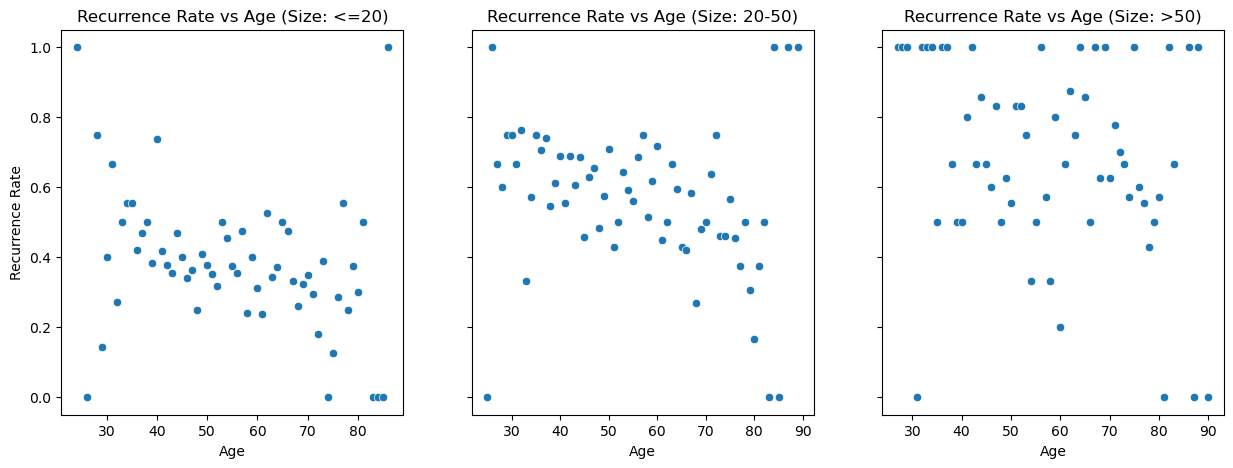

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
size_categories = ['<=20', '20-50', '>50']
for i, size in enumerate(size_categories):
    size_df = df[df['size'] == size]
    age_recur = (
        size_df.groupby('age')['recur']
        .mean()
        .reset_index()
        .rename(columns={'recur': 'recur_rate'})
    )
    sns.scatterplot(x='age', y='recur_rate', data=age_recur, ax=axs[i])
    axs[i].set_title(f'Recurrence Rate vs Age (Size: {size})')
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel('Recurrence Rate')

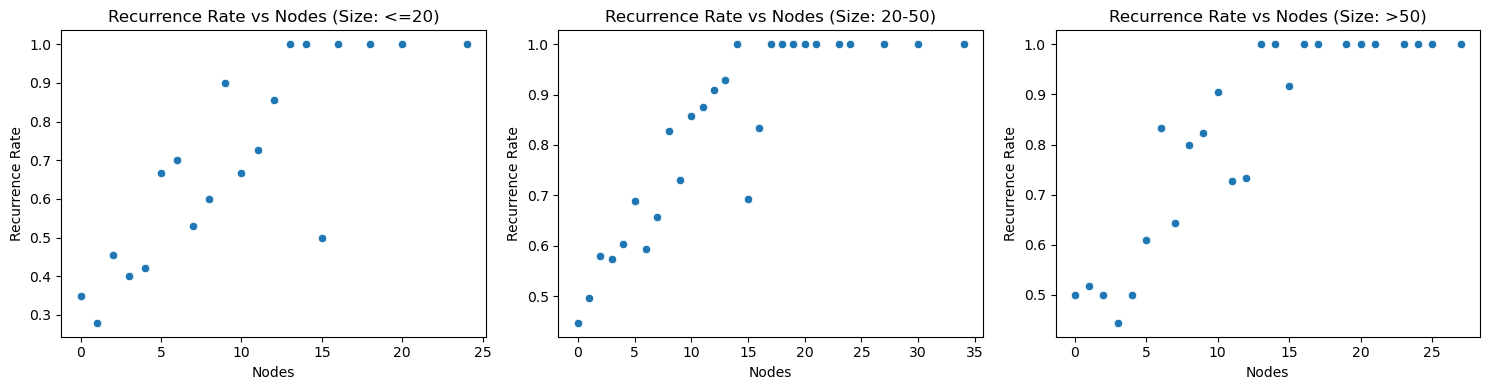

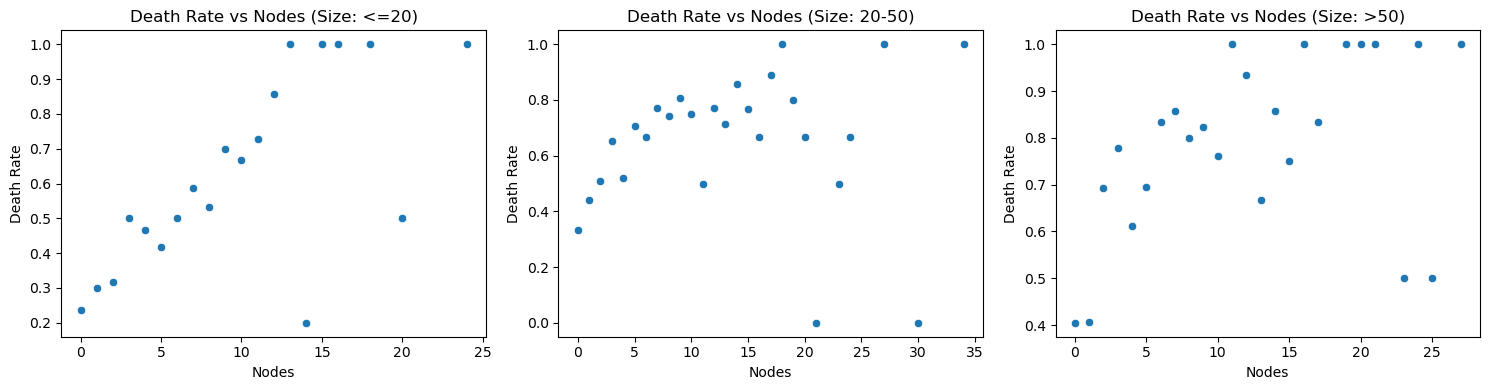

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax = ax.flatten()
for i, size in enumerate(size_categories):
    size_df = df[df['size'] == size]
    node_recur = (
        size_df.groupby('nodes')['recur']
        .mean()
        .reset_index()
        .rename(columns={'recur': 'recur_rate'})
    )
    sns.scatterplot(x='nodes', y='recur_rate', data=node_recur, ax=ax[i])
    ax[i].set_title(f'Recurrence Rate vs Nodes (Size: {size})')
    ax[i].set_xlabel('Nodes')
    ax[i].set_ylabel('Recurrence Rate')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax = ax.flatten()
for i, size in enumerate(size_categories):
    size_df = df[df['size'] == size]
    node_death = (
        size_df.groupby('nodes')['death']
        .mean()
        .reset_index()
        .rename(columns={'death': 'death_rate'})
    )
    sns.scatterplot(x='nodes', y='death_rate', data=node_death, ax=ax[i])
    ax[i].set_title(f'Death Rate vs Nodes (Size: {size})')
    ax[i].set_xlabel('Nodes')
    ax[i].set_ylabel('Death Rate')

plt.tight_layout()
plt.show()

C:\Users\ricca\AppData\Local\Temp\ipykernel_35476\3301861369.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_df.groupby(['age_group', 'hormon'])['recur']
C:\Users\ricca\AppData\Local\Temp\ipykernel_35476\3301861369.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_df.groupby(['age_group', 'hormon'])['recur']
C:\Users\ricca\AppData\Local\Temp\ipykernel_35476\3301861369.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silenc

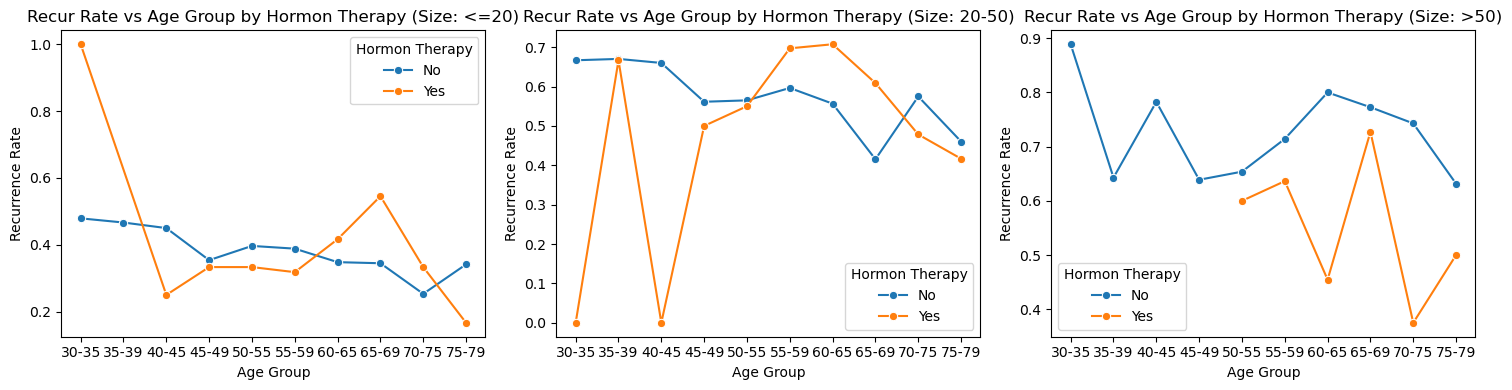

C:\Users\ricca\AppData\Local\Temp\ipykernel_35476\3301861369.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_df.groupby(['age_group', 'chemo'])['recur']
C:\Users\ricca\AppData\Local\Temp\ipykernel_35476\3301861369.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_df.groupby(['age_group', 'chemo'])['recur']
C:\Users\ricca\AppData\Local\Temp\ipykernel_35476\3301861369.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

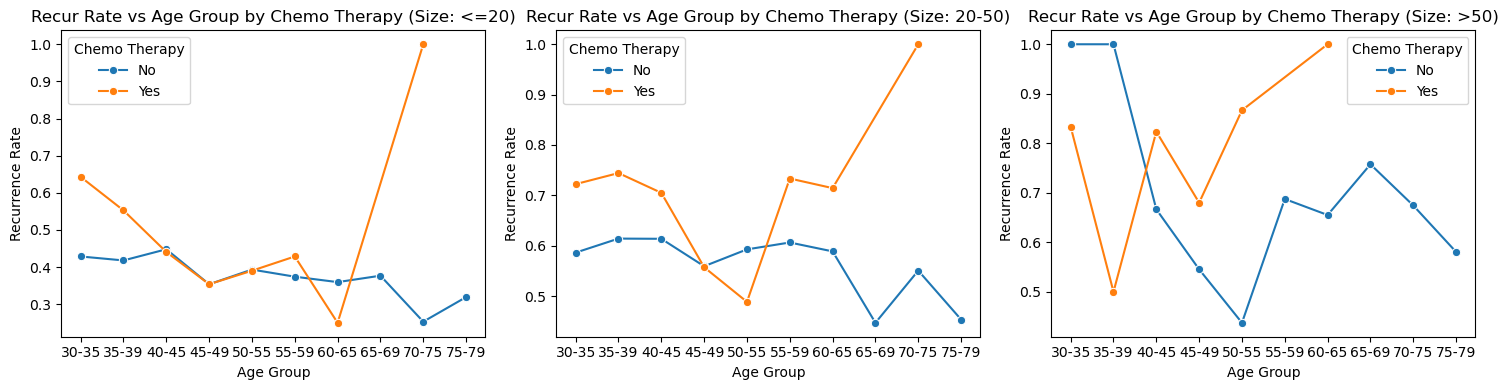

In [25]:
# Task: observe how hormon therapy and node count affects recurrence rates across different tumor sizes in different ranges of age, and observe how chemo therapy and node count affects recurrence rates across different tumor sizes in different ranges of age.
import pandas as pd
age_bins = [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
age_labels = ['30-35', '35-39', '40-45', '45-49', '50-55', '55-59', '60-65', '65-69', '70-75', '75-79']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax = ax.flatten()
for i, size in enumerate(size_categories):
    size_df = df[df['size'] == size]
    hormon_age_recur = (
        size_df.groupby(['age_group', 'hormon'])['recur']
        .mean()
        .reset_index()
        .rename(columns={'recur': 'recur_rate'})
    )
    sns.lineplot(x='age_group', y='recur_rate', hue='hormon', data=hormon_age_recur, marker='o', ax=ax[i])
    ax[i].set_title(f'Recur Rate vs Age Group by Hormon Therapy (Size: {size})')
    ax[i].set_xlabel('Age Group')
    ax[i].set_ylabel('Recurrence Rate')
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles=handles, labels=['No', 'Yes'], title='Hormon Therapy')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax = ax.flatten()
for i, size in enumerate(size_categories):
    size_df = df[df['size'] == size]
    chemo_age_recur = (
        size_df.groupby(['age_group', 'chemo'])['recur']
        .mean()
        .reset_index()
        .rename(columns={'recur': 'recur_rate'})
    )
    sns.lineplot(x='age_group', y='recur_rate', hue='chemo', data=chemo_age_recur, marker='o', ax=ax[i])
    ax[i].set_title(f'Recur Rate vs Age Group by Chemo Therapy (Size: {size})')
    ax[i].set_xlabel('Age Group')
    ax[i].set_ylabel('Recurrence Rate')
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles=handles, labels=['No', 'Yes'], title='Chemo Therapy')

plt.tight_layout()
plt.show()

In [21]:
# perform a chi square test to see if there is a significant association between the recurrence and non-recurrence groups
from scipy.stats import chi2_contingency
import pandas as pd

for size in size_categories:
    size_df = df[df['size'] == size]
    contingency_table = pd.crosstab(size_df['hormon'], size_df['recur'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for Hormon Therapy and Recurrence (Size: {size}):")
    print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}\n")
for size in size_categories:
    size_df = df[df['size'] == size]
    contingency_table = pd.crosstab(size_df['chemo'], size_df['recur'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for Chemo Therapy and Recurrence (Size: {size}):")
    print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}\n")
# Exploratory Data Analysis (EDA) on Rotterdam Breast Cancer Dataset
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('rotterdam.csv')

# Perform exploratory data analysis (EDA)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.duplicated().sum())
print(df['meno'].value_counts(normalize=True))
print(df['chemo'].value_counts(normalize=True))
print(df[['meno', 'chemo']].value_counts(normalize=True))
# Visualize distributions of numeric variables
num_vars = ["year", "age", "nodes", "pgr", "er", "rtime", "dtime"]
cat_vars = ["hospital_id", "meno", "size", "grade", "hormon", "chemo", "recur", "death"]
for var in num_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, kde=True, color="#0099ff", alpha=0.4)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()
for var in cat_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=var, color="#ff6600")
    plt.title(f'Count of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()
# Pairwise relationships and correlation structure for numeric predictors
num_predictors = sorted(num_vars)
sns.pairplot(df[num_predictors], corner=True, diag_kind='kde')
plt.show()
plt.figure(figsize=(8, 6))
corr = df[num_predictors].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
# Covariance matrix for numeric predictors
cov_matrix = df[num_predictors].cov()
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
plt.title('Covariance Matrix Heatmap')
plt.show()
# Categorical predictors: dependency with the outcome
cat_predictors = sorted(cat_vars - {'death'})
ncols = 3
nrows = (len(cat_predictors) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4 * nrows), sharey=True)
for i, var in enumerate(cat_predictors):
    share = df.groupby([var, 'death']).size().groupby(level=0).apply(lambda x: x / x.sum()).unstack(fill_value=0).sort_index()
    sns.barplot(x=share.index, y=share.columns, data=share, ax=axes[i // ncols, i % ncols])
    axes[i // ncols, i % ncols].set_title(f'Death share across {var}')
    axes[i // ncols, i % ncols].set_xlabel(var)
    axes[i // ncols, i % ncols].set_ylabel('Proportion')
plt.tight_layout()
plt.show()
# Additional visualizations
for var in num_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=var)
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=df, y=var)
    plt.title(f'Violinplot of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()
for var in num_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, hue='death', kde=True, alpha=0.4, color="#0099ff")
    plt.title(f'{var} by death')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

NameError: name 'size_categories' is not defined